In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 1.15303139,  0.78471779,  0.49901377, ...,  0.49519945,
        -0.21787246, -0.51142997],
       [-0.22093273, -1.48801416, -0.60745566, ...,  0.73971779,
         0.71920557,  0.52263043],
       [-1.14075417,  0.42752413, -0.38239174, ...,  1.39876119,
        -0.76877395, -0.3459253 ],
       ...,
       [-0.01917309,  0.5082052 , -1.16724028, ...,  1.3326036 ,
        -1.5826336 ,  1.46122539],
       [-0.82221807, -0.54195726,  1.04831858, ...,  0.39575285,
         0.04550299, -0.65737628],
       [-1.55853763,  0.562506  ,  1.43594663, ..., -0.96721807,
        -0.54603914, -1.32817318]])

In [4]:
X_test = sc.fit_transform(X_test)
X_test

array([[-5.86068739e-01, -1.32390471e+00, -6.05794639e-01, ...,
         8.06010031e-01, -3.24040338e-01, -4.56172865e-01],
       [-1.26758455e+00,  1.38862624e+00, -1.05268462e+00, ...,
         1.49796071e+00,  8.49466379e-01,  1.75141918e+00],
       [ 9.53880527e-01, -9.75591459e-01,  7.23231217e-01, ...,
         1.05108191e-03, -1.73860612e-02,  1.74850174e+00],
       ...,
       [-4.30476367e-01, -1.62011410e+00,  3.39539044e-01, ...,
         1.71860159e+00,  1.25429659e+00, -8.96040476e-01],
       [-1.09760841e+00,  4.28259474e-01,  1.26180022e+00, ...,
        -9.14403537e-01,  1.13935686e+00, -9.12809395e-01],
       [ 1.52327406e+00, -2.01525020e-01,  3.32945200e-01, ...,
        -1.36269410e+00, -1.08370476e+00, -1.00753348e+00]])

In [5]:
#pip install keras

In [6]:
#pip install tensorflow

In [7]:
from keras import Sequential
from keras.layers import Dense

In [8]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=20))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [9]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [10]:
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 606us/step - loss: 0.6933 - accuracy: 0.4100
Epoch 2/100
20/20 [==============================] - 0s 550us/step - loss: 0.6931 - accuracy: 0.5150
Epoch 3/100
20/20 [==============================] - 0s 647us/step - loss: 0.6930 - accuracy: 0.5150
Epoch 4/100
20/20 [==============================] - 0s 648us/step - loss: 0.6926 - accuracy: 0.5150
Epoch 5/100
20/20 [==============================] - 0s 598us/step - loss: 0.6918 - accuracy: 0.5150
Epoch 6/100
20/20 [==============================] - 0s 600us/step - loss: 0.6899 - accuracy: 0.5150
Epoch 7/100
20/20 [==============================] - 0s 607us/step - loss: 0.6850 - accuracy: 0.5150
Epoch 8/100
20/20 [==============================] - 0s 598us/step - loss: 0.6751 - accuracy: 0.5150
Epoch 9/100
20/20 [==============================] - 0s 698us/step - loss: 0.6597 - accuracy: 0.5150
Epoch 10/100
20/20 [==============================] - 0s 599us/step - loss: 0.6368 - accura

In [11]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

7/7 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9550


[0.2559622824192047, 0.9549999833106995]

In [12]:
pred=classifier.predict(X_test)
prob=classifier.predict_proba(X_test)
pred =(pred>0.5)

Instructions for updating:
Please use `model.predict()` instead.


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[414  77]
 [124 385]]


In [14]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       491
           1       0.83      0.76      0.79       509

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



0.799

In [15]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.7929969104016478


In [16]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.86%


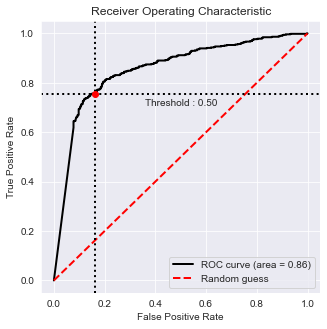

In [17]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.756385068762279